# Table of Contents
1. Basic Statistics 
2. World
## 3. USA
4. Individual City in USA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import geopandas as gpd
import plotly.express as px
from matplotlib.lines import Line2D
from math import pi

# 3. USA

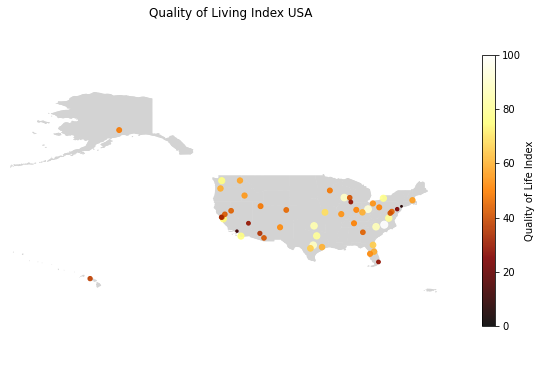

In [6]:
## Dot plot cities with variable colors on the map

# choose year
year = 2022

# importing data

qol_us = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv")
qol_us_yr = qol_us.loc[(qol_us['Year'] == year)]


# importing map 
usa = gpd.read_file("tl_2021_us_state.shp")
usa.head()

# Creating axes and plotting USA map
ax = usa.plot(color="lightgrey", figsize=(10, 10))
usa.plot(color="lightgrey", ax=ax)

# Plotting Quality of Life index data with a color map
x = qol_us_yr['Longitude']
y = qol_us_yr['Latitude']
z = qol_us_yr['Quality of Life Index']
plt.scatter(x, y, s=0.5*z, c=z, alpha=0.9, vmin=0, vmax=100, cmap='afmhot')
plt.colorbar(label='Quality of Life Index', shrink=.5)

# Creating axis limits and title
plt.xlim([-180, -60])
plt.ylim([0, 90])
plt.title("Quality of Living Index USA")

# removing outer axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.show()

In [10]:
## average of indexes over years - unscaled numbers

# importing data
qol = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_original_geo.csv")
qol_us = qol[qol['Country'] == 'United States']

cols_indexes = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_avg_us = qol_us.groupby(['Year'])[cols_indexes].mean().round(decimals=1)

qol_avg_us

,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Year,,,,,,,,,
2018,172.9,129.1,50.4,69.3,77.4,4.5,38.0,40.3,79.4
2019,176.0,128.8,49.7,70.1,73.2,4.0,35.2,38.1,77.9
2020,172.8,122.8,50.0,69.9,74.6,3.9,35.7,38.9,77.6
2021,166.0,107.7,48.0,70.0,75.4,4.1,34.5,38.5,76.6
2022,173.0,124.3,48.1,70.2,74.4,4.1,34.1,38.6,76.4


In [45]:
## average of indexes over years - scaled numbers

# importing data
qol_us = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv")

cols_indexes = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_avg_us = qol_us.groupby(['Year'])[cols_indexes].mean().round(decimals=1)

qol_avg_us

,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Year,,,,,,,,,
2018,49.3,52.1,48.3,49.2,57.7,69.4,41.8,54.1,61.2
2019,51.5,48.9,46.1,60.4,67.0,76.9,51.8,54.4,59.6
2020,55.3,57.7,53.4,55.7,66.2,76.2,66.4,52.5,64.7
2021,58.6,51.2,53.5,52.2,66.5,69.7,67.5,55.9,62.9
2022,53.5,46.2,54.5,56.2,71.3,68.4,68.8,56.5,62.5


In [46]:
## getting national average of indexes for each year and add them to previous table

# importing data

qol_us = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv")


cols = ['Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

qol_us_avg = qol_us.groupby(['Year'])[cols].mean().round(decimals=1)

# getting percentage change of the national average
avg_chg = []

for i in range(len(cols)):
    avg_chg.append(
     (qol_us_avg[cols[i]].tolist()[-1] - 
      qol_us_avg[cols[i]].tolist()[0])/
        qol_us_avg[cols[i]].tolist()[0]*100
    )
    
qol_avg_us.loc[len(qol_avg_us)] = avg_chg 

qol_avg_us.rename(index={len(qol_avg_us)-1:'pct_change (over 5yr)'}, inplace=True)

qol_avg_us.round(decimals=1)

,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Year,,,,,,,,,
2018,49.3,52.1,48.3,49.2,57.7,69.4,41.8,54.1,61.2
2019,51.5,48.9,46.1,60.4,67.0,76.9,51.8,54.4,59.6
2020,55.3,57.7,53.4,55.7,66.2,76.2,66.4,52.5,64.7
2021,58.6,51.2,53.5,52.2,66.5,69.7,67.5,55.9,62.9
2022,53.5,46.2,54.5,56.2,71.3,68.4,68.8,56.5,62.5
pct_change (over 5yr),8.5,-11.3,12.8,14.2,23.6,-1.4,64.6,4.4,2.1


In [28]:
# Top US cities of high Quality of Life index

# choose year and number
year = 2022
num = 10 #top10

# importing data
qol_us = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv")
qol_us_yr = qol_us[qol_us['Year']== year]

cols_indexes = ['City', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

top_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=False).head(num)
top_us = top_us[cols_indexes].round(decimals=1)

# reset index so that index start from 1
top_us.index = np.arange(1, len(top_us)+1)


top_us

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
1,Raleigh,100.0,68.1,95.8,77.7,86.3,80.6,72.3,88.9,76.0
2,Columbus,91.5,76.0,74.7,70.9,82.7,69.5,92.4,81.0,53.3
3,Madison,88.5,54.8,97.0,86.2,88.5,75.1,94.3,94.6,18.0
4,Austin,88.1,83.7,89.7,59.4,90.5,75.0,68.7,60.5,72.7
5,Charlotte,86.0,68.9,70.3,73.6,81.8,86.9,67.3,76.2,76.3
6,Oklahoma City,84.5,50.2,60.8,78.2,94.3,82.6,92.2,88.7,64.7
7,Richmond,80.4,53.5,67.4,70.6,87.4,67.7,100.0,70.9,71.3
8,Dallas,79.8,97.4,58.5,40.1,87.2,91.5,66.2,50.6,72.3
9,Buffalo,77.6,46.2,72.1,82.8,71.5,98.5,95.3,77.4,44.6
10,Seattle,75.7,69.5,58.1,71.2,36.8,63.4,49.1,75.4,90.1


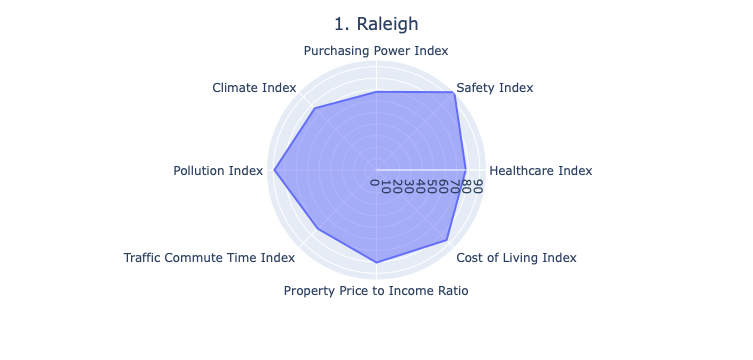

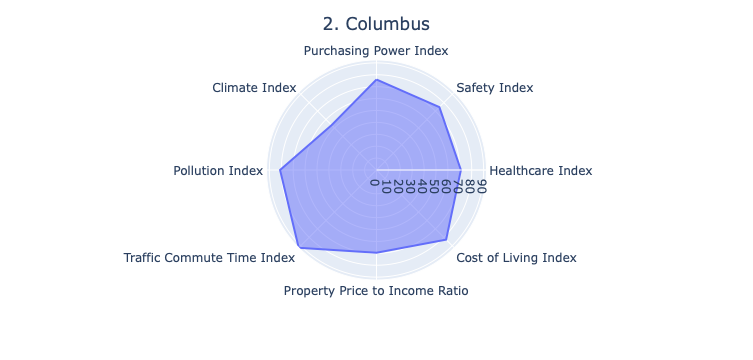

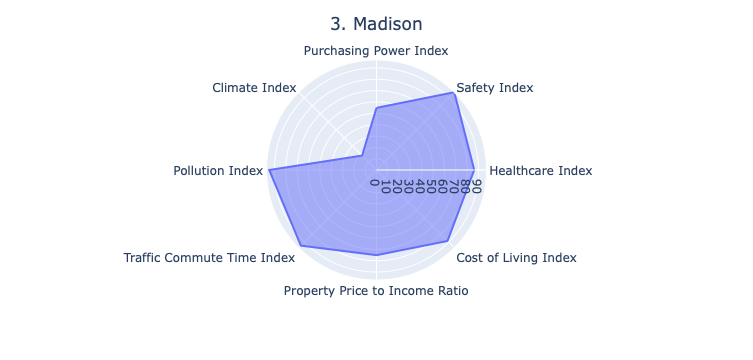

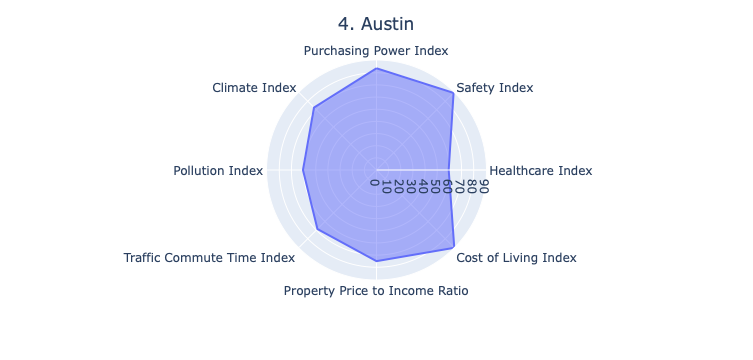

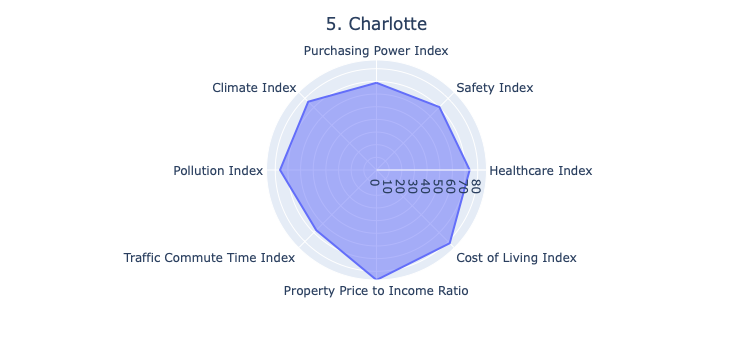

In [8]:
## spider chart for top US cities

# choose year and number
year = 2022
num = 5 #top10

# importing data
qol_us = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv")
qol_us_yr = qol_us[qol_us['Year']== year]


top_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=False).head(10)

top_us = top_us[['City','Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']].round(decimals=1).set_index('City')

indexes_for_chart = ['Purchasing Power Index', 'Safety Index', 'Healthcare Index', 'Cost of Living Index',
                     'Property Price to Income Ratio', 'Traffic Commute Time Index',
                     'Pollution Index','Climate Index']

# plotting on spider chart
for i in range(num):
    df = pd.DataFrame(dict(
    r= top_us[indexes_for_chart].iloc[i],
    theta=indexes_for_chart))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title_text= str(i+1) + '.' + ' ' + top_us.index[i], title_x=0.5)
    fig.show()

In [4]:
# Bottom US cities of high Quality of Life index

# choose year and number
year = 2022
num = 10 #top10

# importing data
qol_us = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv")
qol_us_yr = qol_us[qol_us['Year']== year]

cols_indexes = ['City', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']

bottom_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=True).head(num)
bottom_us = bottom_us[cols_indexes].round(decimals=1)

# reset index so that index start from 1
bottom_us.index = np.arange(1, len(bottom_us)+1)


bottom_us

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
1,Detroit,0.0,30.3,0.5,25.0,80.3,100.0,40.9,15.9,43.9
2,New York,6.7,19.2,66.1,25.0,8.9,0.0,46.8,18.6,68.4
3,Los Angeles,12.1,48.1,59.7,21.2,59.6,41.1,0.0,0.0,96.8
4,Philadelphia,24.3,36.5,29.9,52.8,59.6,69.9,53.2,27.4,65.4
5,Miami,28.3,12.3,52.5,29.6,62.5,54.0,46.2,54.8,79.2
6,Chicago,28.4,58.3,21.5,37.0,64.8,74.2,49.0,35.7,44.0
7,Las Vegas,29.0,46.7,47.1,0.0,86.0,75.7,86.1,28.5,28.4
8,San Francisco,32.0,55.9,38.9,33.6,23.7,33.0,25.2,34.7,100.0
9,Phoenix,34.7,59.0,55.1,43.9,83.5,72.2,72.7,22.6,21.8
10,Honolulu,37.2,7.3,68.7,65.3,0.0,32.0,50.8,59.9,96.5


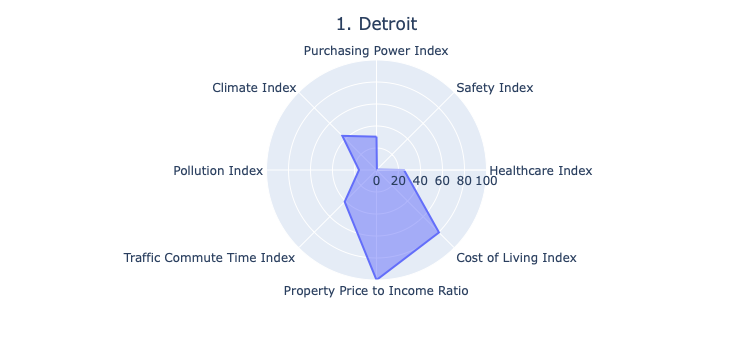

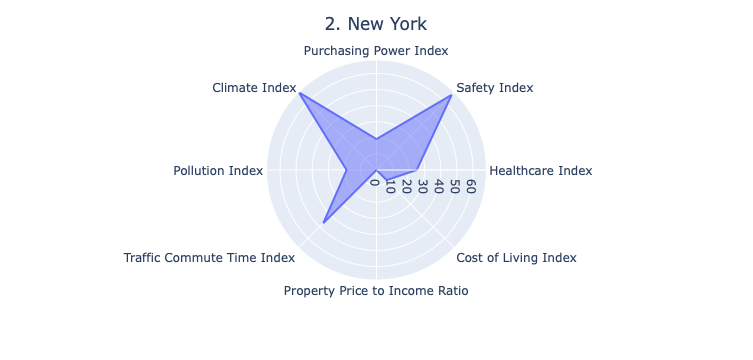

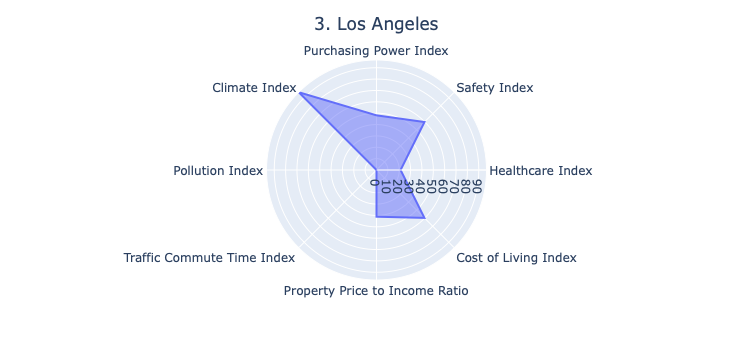

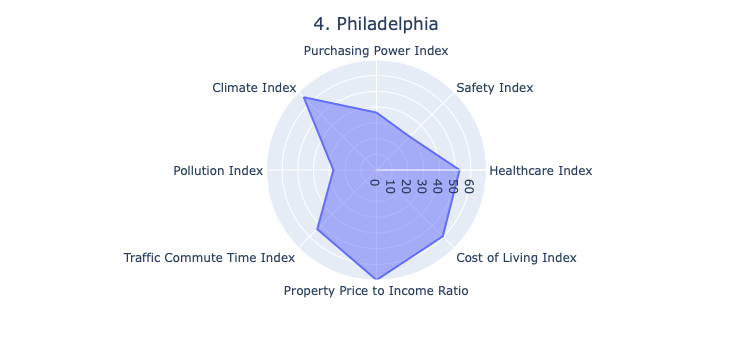

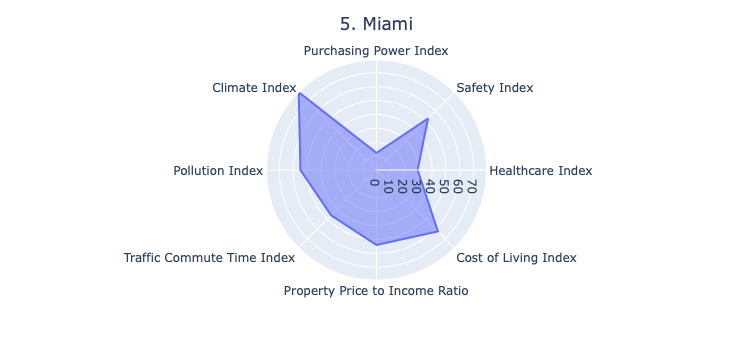

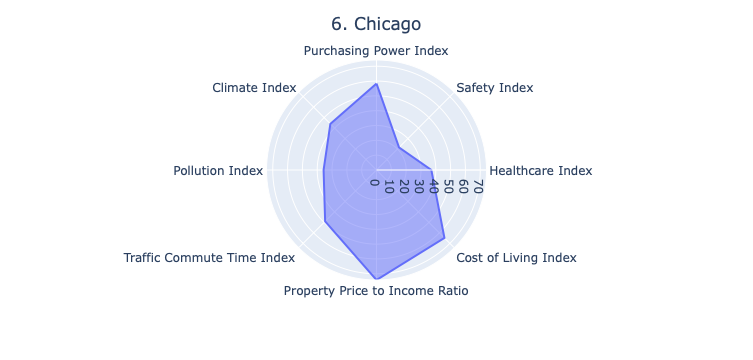

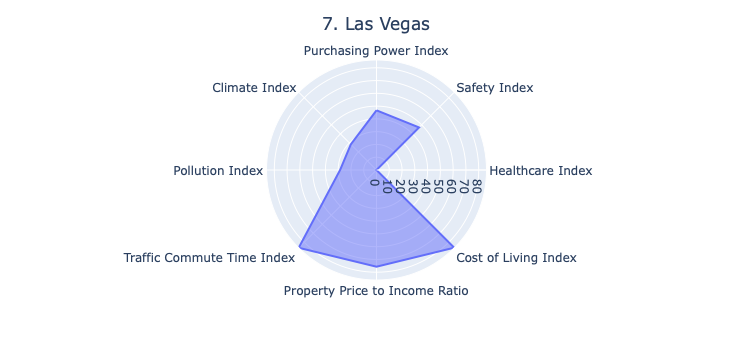

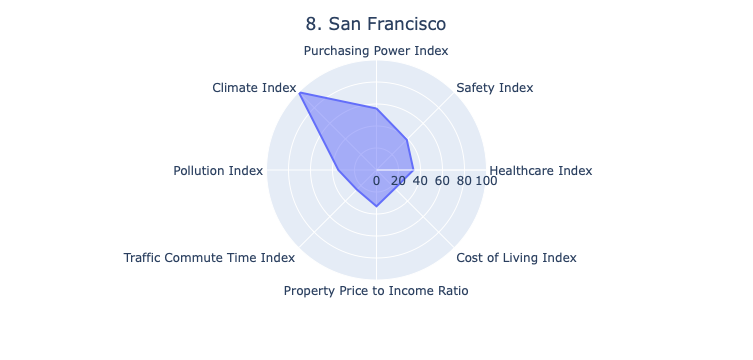

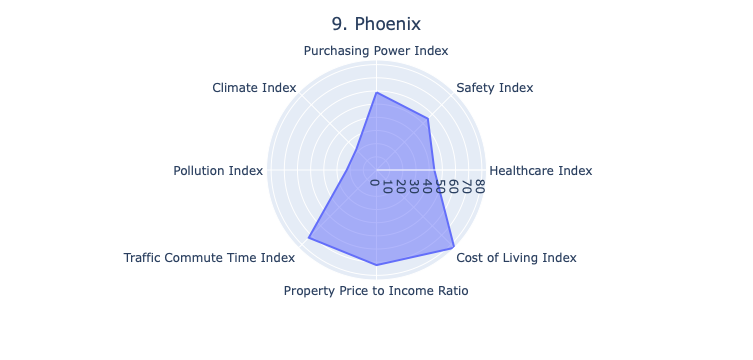

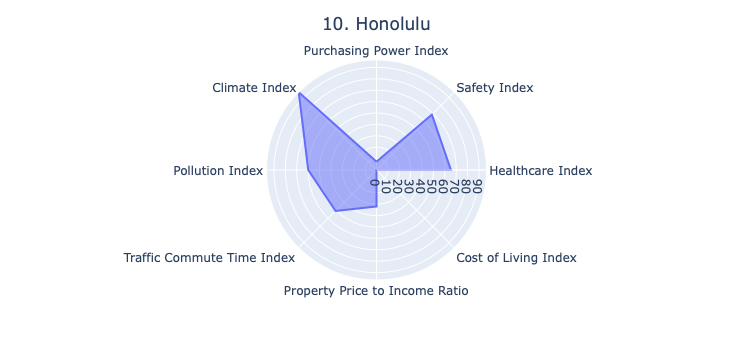

In [7]:
## spider chart for bottom US cities

# choose year and number
year = 2022
num = 10 #top10

# importing data
qol_us = pd.read_csv("../02_data wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv")
qol_us_yr = qol_us[qol_us['Year']== year]


bottom_us = qol_us_yr.sort_values(by='Quality of Life Index', ascending=False).head(10)

bottom_us = top_us[['City','Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Healthcare Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index']].round(decimals=1).set_index('City')

indexes_for_chart = ['Purchasing Power Index', 'Safety Index', 'Healthcare Index', 'Cost of Living Index',
                     'Property Price to Income Ratio', 'Traffic Commute Time Index',
                     'Pollution Index','Climate Index']

# plotting on spider chart
for i in range(num):
    df = pd.DataFrame(dict(
    r= bottom_us[indexes_for_chart].iloc[i],
    theta=indexes_for_chart))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title_text= str(i+1) + '.' + ' ' + bottom_us.index[i], title_x=0.5)
    fig.show()

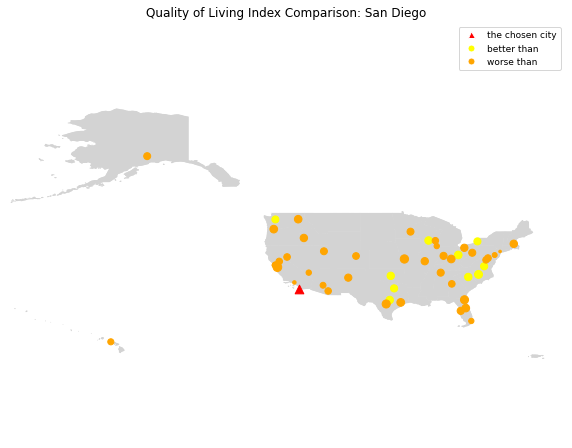

In [32]:
## plotting chosen city on the map with index score higher and lower cities in different colors

# choose criteria
us_city = 'San Diego'
year = 2022

# finding index of the chosen city
chosen_row_us = qol_us.loc[(qol_us['City'] == us_city)
              & (qol_us['Year'] == year)]

# importing map
usa = gpd.read_file("tl_2021_us_state.shp")

# Creating axes and plotting USA map
ax = usa.plot(color="lightgrey", figsize=(10, 10))
usa.plot(color="lightgrey", ax=ax)

# defining values for scatter plots
df_us = qol_us[qol_us['Year'] == year]

df_us_higher = df_us.loc[df_us['Quality of Life Index'] > chosen_row_us['Quality of Life Index'].item()]
x_high_us = df_us_higher['Longitude']
y_high_us = df_us_higher['Latitude']
z_high_us = df_us_higher['Quality of Life Index']
plt.scatter(x=x_high_us, y=y_high_us, s=z_high_us**0.9, c='yellow')

df_us_lower = df_us.loc[df_us['Quality of Life Index'] < chosen_row_us['Quality of Life Index'].item()]

x_low_us = df_us_lower['Longitude']
y_low_us = df_us_lower['Latitude'] 
z_low_us = df_us_lower['Quality of Life Index']
plt.scatter(x=x_low_us, y=y_low_us, s=z_low_us**1, c='orange')

df_us_chosen = df_us.loc[df_us['Quality of Life Index'] == chosen_row_us['Quality of Life Index'].item()]

x_chosen_us = df_us_chosen['Longitude']
y_chosen_us = df_us_chosen['Latitude'] 
z_chosen_us = df_us_chosen['Quality of Life Index']
plt.scatter(x=x_chosen_us, y=y_chosen_us, s=z_chosen_us, c='red', marker='^')

# Creating axis limits and title
plt.xlim([-180, -60])
plt.ylim([0, 90])
plt.title(f"Quality of Living Index Comparison: {us_city}")

# creating legend
custom_legend = [Line2D([0], [0], marker='^', color='w', markerfacecolor='r', markersize=7),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=7),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=7)]
plt.legend(custom_legend,['the chosen city','better than','worse than'], prop={'size': 9})

# removing outer axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.show()